In [8]:
# Nama  : Ivan Trisantoso
# NIM   : 221011402815
# Kelas : 05TPLM007

# Link Github
# https://github.com/IvanTs99/UAS_Kecerdasan-Buatan_Ivan-Trisantoso

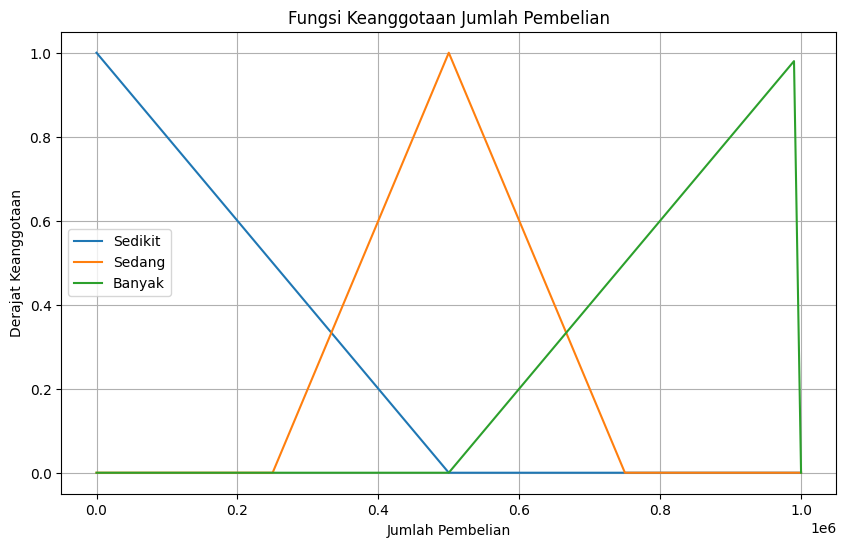

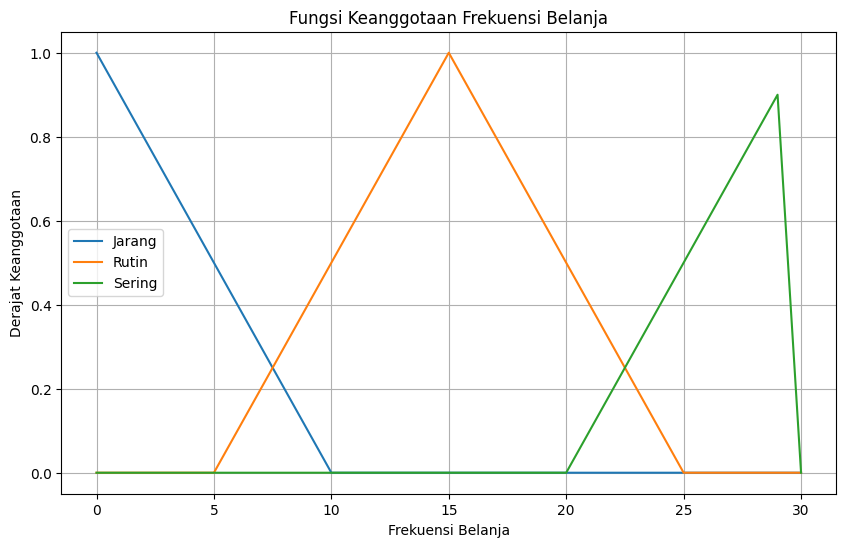

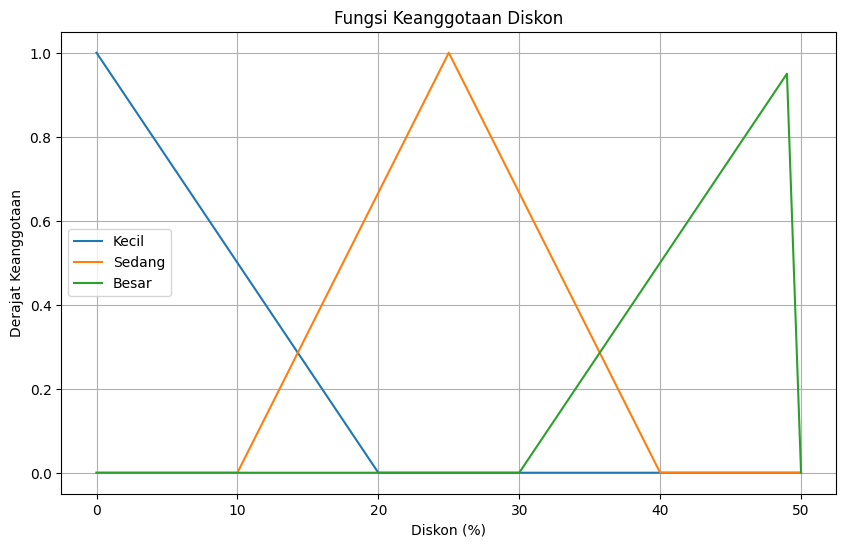

Jumlah Pembelian: 750000
Frekuensi Belanja: 20
Tingkat Diskon: 25.00%
Dengan jumlah pembelian Rp750,000 dan frekuensi belanja 20 kali, pelanggan mendapatkan diskon sebesar 25.00%.


In [6]:
# Program Penentuan Diskon di Toko Online Menggunakan Logika Fuzzy
# Deskripsi:
# Program ini menentukan tingkat diskon berdasarkan jumlah pembelian (dalam rupiah) dan frekuensi belanja pelanggan.
# Variabel fuzzy:
# 1. Jumlah Pembelian: Sedikit, Sedang, Banyak
# 2. Frekuensi Belanja: Jarang, Rutin, Sering
# 3. Diskon: Kecil, Sedang, Besar

import numpy as np
import matplotlib.pyplot as plt

# Custom implementation of fuzzy logic
class FuzzyVariable:
    def __init__(self, nama, semesta, fungsi_keanggotaan):
        self.nama = nama
        self.semesta = semesta
        self.fungsi_keanggotaan = fungsi_keanggotaan

    def fuzzify(self, nilai):
        keanggotaan = {}
        for nama, fungsi in self.fungsi_keanggotaan.items():
            keanggotaan[nama] = fungsi(nilai)
        return keanggotaan

class FuzzyRule:
    def __init__(self, antecedents, consequent):
        self.antecedents = antecedents
        self.consequent = consequent

    def evaluate(self, inputs):
        antecedent_values = [inputs[var][term] for var, term in self.antecedents]
        return min(antecedent_values)

# Fungsi keanggotaan
def trimf(x, a, b, c):
    if x < a or x > c:
        return 0.0
    elif a <= x < b:
        return (x - a) / (b - a) if (b - a) != 0 else 0.0
    elif b <= x <= c:
        return (c - x) / (c - b) if (c - b) != 0 else 0.0

# Definisi variabel fuzzy
jumlah_pembelian = FuzzyVariable(
    "jumlah_pembelian",
    np.arange(0, 1000001, 10000),
    {
        "sedikit": lambda x: trimf(x, 0, 0, 500000),
        "sedang": lambda x: trimf(x, 250000, 500000, 750000),
        "banyak": lambda x: trimf(x, 500000, 1000000, 1000000),
    },
)

frekuensi_belanja = FuzzyVariable(
    "frekuensi_belanja",
    np.arange(0, 31, 1),
    {
        "jarang": lambda x: trimf(x, 0, 0, 10),
        "rutin": lambda x: trimf(x, 5, 15, 25),
        "sering": lambda x: trimf(x, 20, 30, 30),
    },
)

diskon = FuzzyVariable(
    "diskon",
    np.arange(0, 51, 1),
    {
        "kecil": lambda x: trimf(x, 0, 0, 20),
        "sedang": lambda x: trimf(x, 10, 25, 40),
        "besar": lambda x: trimf(x, 30, 50, 50),
    },
)

# Definisi aturan
rules = [
    FuzzyRule([("jumlah_pembelian", "banyak"), ("frekuensi_belanja", "sering")], "besar"),
    FuzzyRule([("jumlah_pembelian", "sedang"), ("frekuensi_belanja", "rutin")], "sedang"),
    FuzzyRule([("jumlah_pembelian", "sedikit"), ("frekuensi_belanja", "jarang")], "kecil"),
    FuzzyRule([("jumlah_pembelian", "banyak"), ("frekuensi_belanja", "rutin")], "sedang"),
    FuzzyRule([("jumlah_pembelian", "sedang"), ("frekuensi_belanja", "sering")], "besar"),
]

# Input nilai
jumlah_pembelian_value = 750000
frekuensi_belanja_value = 20

# Fuzzifikasi input
jumlah_pembelian_membership = jumlah_pembelian.fuzzify(jumlah_pembelian_value)
frekuensi_belanja_membership = frekuensi_belanja.fuzzify(frekuensi_belanja_value)

# Evaluasi aturan
rule_outputs = {}
for rule in rules:
    rule_strength = rule.evaluate({
        "jumlah_pembelian": jumlah_pembelian_membership,
        "frekuensi_belanja": frekuensi_belanja_membership,
    })
    consequent = rule.consequent
    if consequent not in rule_outputs:
        rule_outputs[consequent] = []
    rule_outputs[consequent].append(rule_strength)

# Agregasi output
final_output = {}
for consequent, strengths in rule_outputs.items():
    final_output[consequent] = max(strengths)

# Defuzzifikasi (metode rata-rata berbobot)
def defuzzify(outputs, universe):
    numerator = 0.0
    denominator = 0.0
    for term, strength in outputs.items():
        for x in universe:
            numerator += x * strength
            denominator += strength
    return numerator / denominator if denominator != 0 else 0.0

diskon_value = defuzzify(final_output, diskon.semesta)

# Plot grafik hasil fuzzifikasi
plt.figure(figsize=(10, 6))
plt.plot(jumlah_pembelian.semesta, [jumlah_pembelian.fungsi_keanggotaan["sedikit"](x) for x in jumlah_pembelian.semesta], label="Sedikit")
plt.plot(jumlah_pembelian.semesta, [jumlah_pembelian.fungsi_keanggotaan["sedang"](x) for x in jumlah_pembelian.semesta], label="Sedang")
plt.plot(jumlah_pembelian.semesta, [jumlah_pembelian.fungsi_keanggotaan["banyak"](x) for x in jumlah_pembelian.semesta], label="Banyak")
plt.title("Fungsi Keanggotaan Jumlah Pembelian")
plt.xlabel("Jumlah Pembelian")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(frekuensi_belanja.semesta, [frekuensi_belanja.fungsi_keanggotaan["jarang"](x) for x in frekuensi_belanja.semesta], label="Jarang")
plt.plot(frekuensi_belanja.semesta, [frekuensi_belanja.fungsi_keanggotaan["rutin"](x) for x in frekuensi_belanja.semesta], label="Rutin")
plt.plot(frekuensi_belanja.semesta, [frekuensi_belanja.fungsi_keanggotaan["sering"](x) for x in frekuensi_belanja.semesta], label="Sering")
plt.title("Fungsi Keanggotaan Frekuensi Belanja")
plt.xlabel("Frekuensi Belanja")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(diskon.semesta, [diskon.fungsi_keanggotaan["kecil"](x) for x in diskon.semesta], label="Kecil")
plt.plot(diskon.semesta, [diskon.fungsi_keanggotaan["sedang"](x) for x in diskon.semesta], label="Sedang")
plt.plot(diskon.semesta, [diskon.fungsi_keanggotaan["besar"](x) for x in diskon.semesta], label="Besar")
plt.title("Fungsi Keanggotaan Diskon")
plt.xlabel("Diskon (%)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()
plt.show()

# Output hasil
print(f"Jumlah Pembelian: {jumlah_pembelian_value}")
print(f"Frekuensi Belanja: {frekuensi_belanja_value}")
print(f"Tingkat Diskon: {diskon_value:.2f}%")

# Kesimpulan akhir
def kesimpulan(jumlah_pembelian_value, frekuensi_belanja_value, diskon_value):
    return f"Dengan jumlah pembelian Rp{jumlah_pembelian_value:,} dan frekuensi belanja {frekuensi_belanja_value} kali, pelanggan mendapatkan diskon sebesar {diskon_value:.2f}%."

print(kesimpulan(jumlah_pembelian_value, frekuensi_belanja_value, diskon_value))
